<a href="https://colab.research.google.com/github/jeongwoo22/ESAA_assignments/blob/main/OB_%EA%B3%BC%EC%A0%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 과제3 - 4장 모델 훈련

### **4.1 선형회귀**

#### 4.1.1 정규 방정식(normal equation)

- 정규방정식 : 비용 함수를 최소화 하는 세타를 찾기 위한 해석적인 방법
- 비용함수 : 선형모델의 예측과, 훈련 데이터 사이의 거리를 잼 = 점과 선 사이의 거리를 계산하여 가설과 실제 데이터가 얼마나 다른지를 평가하는 것
- 하나의 데이터와 모델 예측의 차이를 계산하는 것은 손실함수, "모든" 데이터에 대한 차이를 모두 합하여 모델을 평가하는 것이 비용함수

- 비용함수 구체적인 설명 : 가설이 얼마나 정확한지 판단하는 기준을 말하며, loss function의 합, 평균 에러를 다룬다. 여기서 single data set이 아니라 entire data set을 다룬다. 순간마다의 loss를 판단할 땐 loss function을 사용하고 학습이 완료된 후에는 cost function을 확인한다.
출처: https://goatlab.tistory.com/111 [GOATLAB:티스토리]

- 회귀 기본 ==> 회귀 모델을 평가하는 대표적인 지표 ==> MSE(mean squred error) & R2(r-squre)
- mse 는 실제값과 예측값의 차이를 제곱한 뒤, 평균을 낸 것. 어쨋든 오차 (error) 이기 때문에 mse 값은 작을수록 좋다
- r2 는 "결정계수" 로 전체 데이터를 회귀 모형이 얼마나 잘 설명하고 있는지를 보여주는 지표로서, 회귀선의 정확도를 평가하므로 이 값이 1에 가까울수록 정확도가 높다는 것이다

In [7]:
import sklearn
assert sklearn.__version__ >= "0.20"
import sys
assert sys.version_info >= (3, 5)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np

X = 2*np.random.rand(100,1) # 0,1 사이의 균일 분포에서 100,1 행렬 난수 생성
y = 4+3*X +np.random.randn(100,1) # 가우시안 표준 정규 분포에서 100,1 행렬 난수 생성

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # 1로 가득찬 배렬 출력. ==> np.c_는 2개의 1차원 배열을 칼럼으로 새로로 붙여 2차원 배열 만드는 것. 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규 방정식 계산
theta_best

array([[4.04120771],
       [2.90780799]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04120771],
       [9.85682369]])

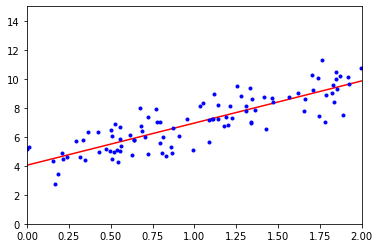

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
# 사이킷런에서 선형회귀 수행
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04120771]), array([[2.90780799]]))

In [10]:
lin_reg.predict(X_new)

array([[4.04120771],
       [9.85682369]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.04120771],
       [2.90780799]])

#### 4.1.2 계산 복잡도

- 계산 복잡도 : 역행렬 계산하는 것

- 정규 방정식으로 학습된 선형 회귀 모델은 예측이 매우 빠름. 계산 복잡도는 샘플 수와 선형적. 즉 샘플이 2배로 늘어나면, 시간도 2배로 늘어남

### **4.2 경사 하강법 (GD)**

- 유용할 때 : 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다
- 경사 하강법 : 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 기본 아이디어 : 비용 함수를 최소화 하기 위해 "반복적으로" 파라미터를 조정해나가는 것

- 그래디언트가 0 이 되면 최솟값에 도달한 것
- 세타를 임의의 값으로 시작해서 무작위 초기화 상태에서 시작. => 점점 최솟값에 수렴할 때 까지 점진적으로 향상됨
- 중요한 파라미터 : 스텝의 크기 => **학습률(learning rate) 하이퍼 파라미터** 로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다 

- 경사 하강법의 2가지 문제 
- 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 **전역 최솟값 (global minimum)** 보다 덜 좋은 **지역 최솟값 (local minimum)** 에 수렴한다. 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추어 전역 최솟값에 도달 못함.

- 다행히 선형회귀를 위한 MSE 비용함수는 ==> 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수이다. 따라서 하나의 전역 최솟값만 있다. 그래서 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함. 

- 비용함수는 그릇 모양을 하고 있으나, 스케일이 다르면 길쭉한 모양이 될 수도 있음 ==> 경사 하강법을 사용할 때는, 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. EX- 사이킷런의 StandardScaler. 그렇지 않으면 수렴하는데 훨씬 오래 걸림

- 훈련 = 비용함수를 최소화하는 모델 파라미터의 조합을 찾는 일 => **모델의 파라미터(parameter space) 공간** 에서 찾는다
- 모델이 가진 파라미터가 많을수록 공간의 차원은 커지고 검색이 어려워짐

#### 4.2.1 배치 경사 하강법

- 경사하강법 구하기 <= 모델 파라미터에 대해 비용함수의 그레디언트를 계산해야 함. 즉, 세타가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산해야함. : **편도함수(partial derivative)** 
- 비용 함수의 그레디언트 벡터를 통해 한꺼번에 계산할 수 있음. 그레디언트 벡터 는 비용함수의 편도함수를 모두 담고 있음

- 이 편도함수를 구하는 공식은 매 경사 하강법 스텝에서 전체 훈련 세트에 대해 계산한다. 그래서 이 알고리즘을 **배치 경사 하강법 (batch gradient descent)** 라고 함
- 매 스텝에서 훈련 데이터 전체를 사용함 ==> 그래서 매우 큰 훈련세트에서는 아주 느림 (빠른 경사 하강법 알고리즘도 있음) 
- 경사 하강법은 특성 수에 민감하지 않음
- 따라서 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠름

In [13]:
# 학습률은 스텝의 크기. 학습률은 우리가 조절할 수 있는 하이퍼 파라미터
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients # 내려가는 스텝의 크기를 경정하기 위해 그레이디언트 벡터에 학습률을 곱한다.

- 적절한 학습률을 찾으려면, 그리드 탐색을 사용한다. 그러나, 그리드 탐색에서 수렴하는데 너무 오래 걸리는 모데을 막기 위해 반복 횟수를 제한해야 한다.

- 반복횟수 지정 : 반복횟수가 너무 작으면 최적점에 도착하기 전에 알고리즘이 멈춤. 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 됨. ==> 반복 횟수를 아주 크게 지정하고, 그레디언트 벡터가 아주 작아지면, 즉 허용오차(tolerance) 보다 작아지면 경사 하강법이 최솟값에 도달할 것이므로 알고지름을 중지하는 것

#### 4.2.2 확률적 경사 하강법

- **배치 경사 하강법의 문제** : 매 스탭에서 전체 훈련 세트를 사용해 그레디언트를 계산해야 하므로 훈련 세트가 커지면 느려진다. 
- **확률적 경사 하강법(SGD)** : 매 스텝에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산. ==> 반복해서 다뤄야 하는 데이터가 적기 때문에, 한번에 하나의 샘플을 처리하면 알고리즘이 빠르다. ++ 매 반복에서 하나의 샘플만 메모리에 있으면 되어서 매우 큰 훈련세트도 훈련시킬 수 있다.  

- **SGD** : 배치 크기가 1인 경사 하강법 알고리즘. 이 때 배치란, 단일 반복에서 기울기를 계산하는데 사용하는 데이터의 총 개수

- 단점 : 무작위이기 때문에, 배치 경사 하강법보다 훨씬 불안정함. 그리고 비용함수가 요동치면서 평균적으로 감소함. - - 장점 : 비용함수가 불규칙하면 알고리즘이 지역 최솟값을 건너뛰므로, 배치 경사 하강법보다 최솟값을 찾을 가능성이 높다
- 따라서 방법 : 학습률을 점진적으로 감소시키는 것. 시작할 때는 학습률을 크게 하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함. 
- **학습 스케쥴(learning schedule)** : 매 반복에서 학습률을 결정하는 함수 

In [14]:
# 학습 스케쥴을 사용한 확률적 경사 하강법 구현
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m): # 한 반복에서 m 번 되풀이 됨 ===> 에포크 (epoch)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

- 위 코드 결과 : 배치 경사 하강법에서는 전체 훈련 세트에 대해 1000번 반복하는 동안, 이 코드는 훈련세트에서 50번만 반복하고 매우 좋은 값에 도달함

- 사이킷런에서 SGD 방식으로 선형회귀를 사용하려면, 기본값으로 MSE 를 최적화하는 SGDRegressor 클래스를 사용한다. 

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# 최대 1000번 에포크 동안 실행됨
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

- epoch 더 알아보기 ++ 기본적인 덧붙임 설명
- 알고리즘이 iterative 하다는 것 :gradient descent와 같이 결과를 내기 위해서 여러 번의 최적화 과정을 거쳐야 되는 알고리즘
- 머신 러닝에서 최적화(optimization)를 할 때는 일반적으로 여러 번 학습 과정을 거친다. ==> 한 번의 학습 과정 역시 사용하는 데이터를 나누는 방식으로 세분화 ==>이때, epoch, batch size, iteration라는 개념이 필요합니다

- epoch : 한 번의 epoch는 인공 신경망에서  전체 데이터 셋에 대해 한 번 학습을 완료한 상태. epochs = 40이라면 전체 데이터를 40번 사용해서 학습을 거치는 것. 우리는 모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있다. epoch 값이 너무 작다면 underfitting이 너무 크다면 overfitting이 발생할 확률이 높은 것.
- batch size : 한 번의 batch마다 주는 데이터 샘플의 size. batch(보통 mini-batch라고 표현)는 나눠진 데이터 셋을 뜻한다. 
- iteration : The number of passes to complete one epoch로, epoch를 나누어서 실행하는 횟수. 
- 결론 : 메모리의 한계와 속도 저하 때문에 대부분의 경우에는 한 번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수는 없다. 그래서 데이터를 나누어서 주게 되는데 이때 몇 번 나누어서 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 한다. 
https://m.blog.naver.com/qbxlvnf11/221449297033 참고


#### 4.2.3 미니배치 경사 하강법

- **미니배치 경사하강법 (mini-batch gradient descent)** 각 스텝에서 전체 훈련 세트(배치 경사 하강법에서 처럼) 하나의샘플 (확률적 경사 하강법에서처럼) 을 기반으로 그레디언트를 계산하는 것이 아니라 미니배치 라 부르는 임의의 작은 샘플 세트에 대해 그레이던트를 계산함. 
- 장점 : 행렬 연산에 최적화된 하드웨어, GPU 를 사용해서 얻는 성능 향상


- 미니배치를 어느정도 크게 하면, 파라미터 공간에서 SGD 보다 덜 불규칙하게 움직인다. 그러면, 미니배치 경사 하강법이 SGD 보다 최솟값에 더 가까이 도달하게 될 것

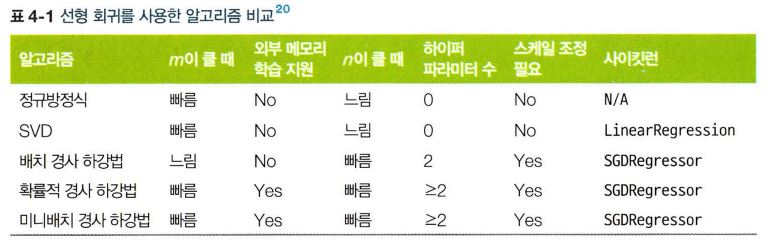

### **4.3 다항 회귀**

- **다항회귀(polynomial regression)** : 가지고 있는 데이터가 단순한 직선보다 복잡한 형태일 때 사용. ==> 비선형 데이터를 학습하는데, 선형 모델 사용가능!! ==> 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

- ex) 2차 방정식으로 비선형 데이터를 만들어서 곡선만들어보기

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

- 확실히 직선은 이 데이터에 잘 맞지 않으므로, 사이킷런의 ploynomial features 사용하여 ==> 훈련 데이터를 변환해봄 ==> 훈련 세트에 있는 각 특성을 제곱(2차 다항) 하여 새로운 특성으로 추가

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 2차 다항으로 설정
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.32169766])

In [20]:
X_poly[0] # 원래 특성 x 와 이 특성의 제곱을 포함

array([-2.32169766,  5.39028001])

In [21]:
# 이 확장된 훈련 데이터에 선형 회귀 적용해보기
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10583336]), array([[0.97470858, 0.4654934 ]]))

- 원래 함수와, 예측된 모델이 비슷함

- 특성이 여러개 일 대, 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다. (일반적인 선형 회귀 모델에서는 불가능) ===> 왜냐하면 Polynomial Freatures 가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문
===> ++ degree = 3으로 하면, 3차항 뿐만 아니라, xy로 되어 있는 특성들도 추가한다. 

### **4.4 학습 곡선**

- 고차 다항 회귀를 적용하면, 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추러 할 거임.  ==> 1차, 2차, 300차 그래프 비교해 놓은거 보면, 300차 다항회귀는 훈련 샘플에 가능한 한 가까이 가려고 구불구불하게 나타남 ====> 이런게 **과적합(overfittnig)** , 반면에 1차 선형회귀는 과소적합임. 일반화가 제일 잘 된건 2차 다항회귀
- 얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까요????????????? 어떻게 모델이 데이터에 과대적합 또는 과소적합 되었는지 알 수 있을까요????????????

- 2장에서 모델의 일반화 성능을 추정하기 위해 교차 검증 사용 => 훈련 데이터에서 성능이 좋지만, 교차 검증 점수가 나쁘면 모델이 과대적합 된 것.(모델 복잡함) 만약 양쪽에 모두 좋지 않으면 과소적합. (모델 단순함)
- 또 다른 방법 ==> 학습 곡선을 살펴보는것 ! ==> 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(훈련반복)의 함수로 나타낸다. 
- 그래프를 생성하기 위해서는 단순히 훈련 세트에 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시키면 됨

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

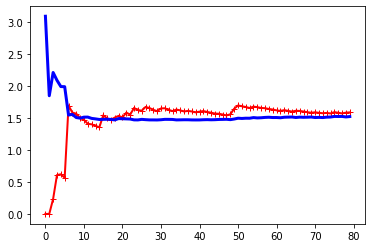

In [25]:
# 단순 선형 회귀 모델(직선)의 학습 곡선 살펴보기 ====> 빨간색이 훈련세트, 파란색이 검증세트
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 훈련데이터 : 그래프가 0에서 시작, 훈련세트에 샘플이 추가 되어도 평균 오차가 크게 나아지거나 나빠지지 않음
- 검증데이터 : 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큼
- 과소적합의 모습. 두 곡선이 수평한 구간을 만들고, 꽤 높은 오차에서 매우 가까이 근접

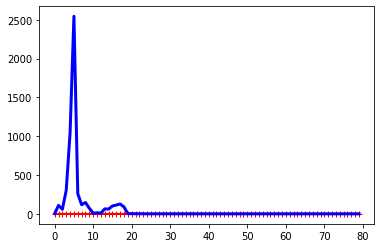

In [27]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

- 위 학습 곡선에 비해 : 두가지 중요한 차이점이 존재

- 훈련 데이터 : 오차가 선형회귀 모델보다 후러씬 낮다
- 두 곡선 사이에 공간 존재 : 모델 성능이 훈련이 검증보다 좋다는 것. 과대 적합 모델의 특징. 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

- 일반화 오차를 세가지 오차의 합으로 표현하기 
- 편향
- 분산
- 줄일 수 없는 오차
- 편향/ 분산 트레이드 오프: 모델의 복잡도가 커지면 분산이 늘어나고, 편향은 줄어듦. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아짐

### **4.5 규제가 있는 선형 모델**

- 과적합 줄이는 방법 : 모델을 규제하는 것 
- 자유도 줄이면, 과적합 되기 어려움 => 따라서 다항 회귀에서 모델을 규제하는 방법은 다항식의 차수를 감소시키는 것

#### 4.5.1 릿지 회귀

- **릿지회귀 (Ridge Regression)** : 규제가 추가된 선형 회귀 버전. 규제항이 비용함수에 추가됨.  ==> 모델의 가중치가 최대한 작게 유지 ==> 규제항은 훈련하는 동안에만 비용함수에 추가되고, 끝나면 모델 성능을 평가하는 지표로 사용

- 하이퍼 파라미터 알파 : 모델을 얼마나 규제할지 조절 a=0 이면 선형회귀와 같음. a가 너무 크면 가중치가 거의 0 이고, 데이터의 평균을 지나는 수평선이 됨.

- 릿지 회귀는 입력 특성의 스케일에 민감해서 데이터의 스케일을 standardscalar 등을 사용해서, 스케일을 맞춰주는게 중요.
- 릿지 모델을 사용한 선형회귀와 다항회귀의 비교 : a 가 커질수록 직선에 가까워짐. 

- 선형회귀와 마찬가지로, 회귀를 계산하기 위해 정규방정식을 사용할수도 있고, 경사하강법을 사용할 수도 있다. 장단점은 같음

In [29]:
# 정규 방정식을 사용하여 릿지 회귀 만들기
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.0471462]])

In [32]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.02754923])

#### 4.5.2 라쏘 회귀

- **라쏘(Lasso)회귀** : 선형 회귀의 또 다른 규제된 버전. 릿지 처럼 비용함수에 규제항을 더하지만, 가중치 공식이 조금 다름

- 중요한 점 : 덜 중요한 특성의 가중치를 제거하려고 한다 (즉, 덜 중요한 특성의 가중치가 0 - ex- 차수가 높은 다항 특성의 가중치가 모두 0)
- 라쏘 회귀는 자동으로 특성 선택을 하고 **희소모델(sparse model)**을 만든다.

- 라쏘를 사용할 때 경사하강법이 최적점 근처에서 진동하는 것을 막으려면, 훈련하는 동안 점진적으로 학습률을 감소시켜야 함. 

- 라쏘 비용 함수에 경사 하강법을 적용하는데 문제가 없도록 하기 위하여 **서브그레디언트 벡터(g)** 를 사용한다. 

In [33]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([5.00210961])

- Lasso 대신 SGDRegressor(penalty="l1") 을 사용할 수도 있다.

#### 4.5.3 엘라스틱넷

- **엘라스틱넷(Elastic net)**: 릿지 회귀와 라쏘 회귀를 절충한 모델. 규제항은 릿지와 회귀의 규제항을 단순히 더하여 사용. 혼합 정도는 혼합 비율 r 을 사용해 조절한다. r=0 이면, 엘라스틱넷은 릿지 회귀와 같고, r=1 이면 라쏘 회귀와 같다

- 보통의 선형회귀(규제가 없는 모델), 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 할까????????????
- 대부분의 경우 규제가 있는게 좋아서, 일반적으로 평범한 선형회귀는 피해야 함 ==> 릿지는 기본이 되지만 쓰이는 특성이 몇개뿐이라고 의심돼?? ==> 그렇다면 라쏘나 엘라스틱넷 하기. 왜냐하면 몇몇 특성을 가충치 0 으로 만들어 버리니까. (++ 특성 수가 훈련 샘플수보다 많거나 특성 몇개가 강하게 연관되어 있을 때는 라쏘가 이상해서, 엘라스틱넷을 쓴대)

In [34]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.00138736])

#### 4.5.4 조기 종료

- 경사하강법과 같이 반복적인 알고리즘을 규제하는 색다른 방식 ===> **조기종료 (early stopping)**검증에러가 최솟값에 도달하면 바로 훈련 중지해야함

- 즉 : 훈련 데이터에 과적합 되기 전에 훈련을 멈추는 것. 

- 확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인이 어려울 수도 있다. 

### **4.6 로지스틱 회귀**

- 어떤 회귀 알고리즘은 분류에서도 사용할 수 있다!!!
- 로지스틱 회귀(Logistic Regression) : 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨 (ex - 이 이메일이 스팸일 확률은 얼마인가? 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측) 
- **양성 클래스(positive class)** : 레이블이 1
- **음성 클래스(negative class)** : 레이블이 0 ==> 이런 애들을 이진분류기!!

#### 4.6.1 확률 추정

- 로지스틱 회귀의 실제 작동 : 선형 회귀 모델과 같이 로지스틱 회귀 모델은 **입력 특성의 가중치 합을 계산** 그러고 편향을 더함. 
- 대신 선형 회귀 처럼 바로 결과를 출력하는게 아니라 결과값의 로지스틱을 출력
- 로지스틱 = **시그모이드(sigmoid function)함수** 로 !!!! 0과 1 사이의 값을 출력 !!!!

#### 4.6.2 훈련과 비용 함수

- 로지스틱 회귀 훈련시키는 방법 ++ 훈련 목적 : 양성에서는 높은 확률을 추정, 음성 샘플에서는 낮은 확률을 추정하는 ==> 모델 파라미터 벡터를 찾는 것!! 
- **로그 손실(log loss)** : 전체 훈련 세트에 대한 비용함수는 모든 훈련 샘플의 비용을 평균한 것

#### 4.6.3 결정 경계

- 붓꽃 데이터를 통해서 알아보기 

In [37]:
# iris-versicolor 종을 감지하는 분류기 만들기 
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [38]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

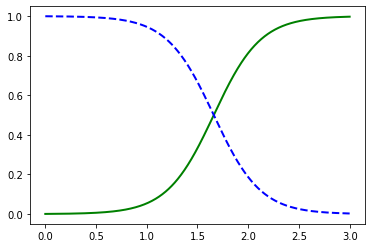

In [40]:
# 꽃잎의 너비가 0~3 cm 인 꽃에 대해 모델의 추정확률 계산하기
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

- 결과를 보면 꽃잎의 2cm 너비가 되는 이상은 분류기가 verginica 라고 높은 확률을 보임 (초록색 선) 반면 1cm 아래면 verginica 아님 이라고 강하게 추측 (파란색 점선) 이 두 극단 사이에는 분류가 확실하지 않음. 그러나 클래스를 예측하려고 하면 가장 가능성 높은 클래스를 반환함 그래서, 1.6cm 근방에서 **결정경계(decision boundary)**가 만들어짐. 그래서 1.6cm 보다 크고 작음에 따라 다르게 분류함. 

In [41]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- 한가지 특성에 대해서 위의 그래프 처럼도 나눌 수 있지만, 2가지 특성에 대해서도 나눠볼 수 있따~~! 
- 붓꽃에서 꽃잎 너비와 꽃잎 길이 두개의 특성으로 보았을 때, 점선이 경계,(선형) 직선이 모델의 특정 확률을 출력하는 포인트를 나타냄. 

#### 4.6.4 다항 로지스틱 회귀 = 소프트맥스 회귀(multinomial logistic regression)

- **다항 로지스틱 회귀** : 여러개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화 한 것
- 개념 : 매우 간단. 샘플 x가 주어지면, 각 클래스에 대하여 점수를 계산하고, 그 점수에 **소프트맥스 함수(정규화된 지수함수)**를 적용하여 각 클래스의 확률을 추정한다.
- 각 클래스는 자신만의 파라미터 벡터가 있다 ==> **파라미터 행렬(parameter matrix)**


- 샘플 당 클래스의 점수가 계산되면, 소프트맥스 함수를 통과시켜서 ==> k 에 속할 확률을 추정할 수 있음. 
- 그리고, 로지스틱 회귀 분류기와 마찬가지로 추정 확률이 가장 높은 클래스를 선택한다


- 훈련 목적 : 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것
- **크로스 엔트로피(cross entropy)** 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제. => 그래서 사용
- 딱 2개의 클래스가 있을 때, 이는 로지스틱 회귀의 비용 함수와 같다. 

- 클래스에 대한 그레디언트 벡터 계산 ==> 비용함수 최소화 하기 위한 파라미터 행렬 찾기 위해 경사 하강법 사용

- 소프트 맥스 회귀로 붓꽃을 3개의 클래스로 나누기 ==> Logistic Regression 사이킷런의 클래스 는 클래스가 2개 이상일 때 OvA 즉 일대 다 전략을 사용함. 

In [43]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [44]:
softmax_reg.predict([[5, 2]])

array([2])

In [45]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

### **4.7 연습문제**